# 1. Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings('ignore')

In [2]:
data_heatmap = pd.read_csv('../datasets/A_data_heatmap_300x250_3p.csv')
data_metrics = pd.read_csv('../datasets/A_data_domain_perf_metrics_300x250_3p.csv')
data_heatmap_new1 = pd.read_csv('../datasets/A_data_heatmap_300x250_6p_h2m.csv')
data_heatmap_new2 = pd.read_csv('../datasets/A_data_heatmap_300x250_6p_t2m.csv')

In [3]:
data_metrics_6p = pd.read_csv('../datasets/A_data_domain_perf_metrics_300x250_6p.csv')

In [4]:
data_heatmap_6p = pd.concat([data_heatmap_new1,data_heatmap_new2],axis=0).drop(columns=['click_x_rel','click_y_rel'])

In [5]:
# importing broken banners
cb_333519 = ['ID_1184', 'ID_1281', 'ID_1305', 'ID_1353', 'ID_1448', 'ID_1522',
       'ID_1544', 'ID_162', 'ID_1682', 'ID_1690', 'ID_1824', 'ID_1888',
       'ID_1929', 'ID_2076', 'ID_2097', 'ID_2226', 'ID_2249', 'ID_2268',
       'ID_2331', 'ID_2339', 'ID_2386', 'ID_2396', 'ID_2438', 'ID_258',
       'ID_2609', 'ID_2680', 'ID_2863', 'ID_2883', 'ID_2908', 'ID_3061',
       'ID_3243', 'ID_3250', 'ID_3314', 'ID_3382', 'ID_3397', 'ID_3402',
       'ID_3420', 'ID_3459', 'ID_3470', 'ID_3540', 'ID_398', 'ID_409',
       'ID_484', 'ID_489', 'ID_526', 'ID_549', 'ID_580', 'ID_665',
       'ID_810', 'ID_84', 'ID_857', 'ID_86', 'ID_905', 'ID_927', 'ID_934',
       'ID_962', 'ID_986']

cb_333346 = ['ID_1247', 'ID_162', 'ID_2534', 'ID_2742', 'ID_526', 'ID_2201',
       'ID_1165', 'ID_743', 'ID_199', 'ID_2145', 'ID_2569', 'ID_643',
       'ID_1305', 'ID_3180', 'ID_3158', 'ID_136', 'ID_293', 'ID_1753',
       'ID_1849', 'ID_2226', 'ID_1462', 'ID_626', 'ID_2863', 'ID_3243',
       'ID_3250', 'ID_1708', 'ID_1238', 'ID_580', 'ID_84', 'ID_2568',
       'ID_2340', 'ID_1803', 'ID_3470', 'ID_139', 'ID_2619', 'ID_2908',
       'ID_1281', 'ID_3308', 'ID_2883', 'ID_1320', 'ID_1333', 'ID_1062',
       'ID_149', 'ID_260', 'ID_599', 'ID_1513', 'ID_3402', 'ID_1888',
       'ID_2972', 'ID_398', 'ID_2339', 'ID_1030', 'ID_3382', 'ID_2076',
       'ID_1646', 'ID_1077', 'ID_10', 'ID_1153', 'ID_1533', 'ID_2609',
       'ID_1214', 'ID_810', 'ID_2097', 'ID_2386', 'ID_1585', 'ID_549',
       'ID_3420', 'ID_3397', 'ID_2006', 'ID_561', 'ID_1542', 'ID_1570',
       'ID_1819', 'ID_1413', 'ID_1240', 'ID_793', 'ID_831', 'ID_3188',
       'ID_1437', 'ID_556', 'ID_1134', 'ID_314', 'ID_2836', 'ID_1483',
       'ID_2676', 'ID_665', 'ID_15', 'ID_2755', 'ID_2194', 'ID_1682',
       'ID_2775', 'ID_1923', 'ID_1846', 'ID_1262', 'ID_3314', 'ID_1448',
       'ID_1770', 'ID_2626', 'ID_3296', 'ID_489', 'ID_1963', 'ID_1268',
       'ID_1568', 'ID_1094', 'ID_2267', 'ID_409', 'ID_1650', 'ID_1522',
       'ID_927', 'ID_2302', 'ID_1929', 'ID_1435', 'ID_1353']

cb_333346_6p = ['ID_106', 'ID_1108', 'ID_1111', 'ID_1150', 'ID_1217', 'ID_136', 
             'ID_1542', 'ID_1589', 'ID_1602', 'ID_185', 'ID_1908', 'ID_1915', 
             'ID_1916', 'ID_1971',  'ID_2015', 'ID_2063', 'ID_2133', 'ID_2143', 
             'ID_2336', 'ID_2337', 'ID_2368', 'ID_243', 'ID_245', 'ID_2553', 
             'ID_2564', 'ID_2635', 'ID_2636', 'ID_267', 'ID_2693', 'ID_27', 
             'ID_2737', 'ID_2750', 'ID_2762', 'ID_2867', 'ID_2924', 'ID_2933', 
             'ID_2977', 'ID_3172', 'ID_3219', 'ID_324', 'ID_3268', 'ID_333', 
             'ID_3334', 'ID_3487', 'ID_3526', 'ID_3535', 'ID_3567', 'ID_3605', 
             'ID_362', 'ID_3633', 'ID_3640', 'ID_365', 'ID_367', 'ID_3672', 
             'ID_3699', 'ID_3730', 'ID_3809', 'ID_3837', 'ID_3848', 'ID_3920', 
             'ID_3939', 'ID_3982', 'ID_401', 'ID_4042', 'ID_4058', 'ID_4072', 
             'ID_4076', 'ID_4199', 'ID_4206', 'ID_4224', 'ID_4378', 'ID_4507', 
             'ID_466', 'ID_494', 'ID_539', 'ID_62', 'ID_727', 'ID_737', 
             'ID_861', 'ID_876', 'ID_889', 'ID_90', 'ID_922', 'ID_949', 
             'ID_981', 'ID_993']

cb_333519_6p = ['ID_1081', 'ID_1150', 'ID_1464', 'ID_1518', 'ID_1622', 'ID_1623', 
                'ID_1624', 'ID_1631', 'ID_1678', 'ID_1623', 'ID_1731', 'ID_1752', 
                'ID_1764', 'ID_1795', 'ID_1915', 'ID_1916', 'ID_1971', 'ID_198', 
                'ID_2018', 'ID_204', 'ID_2044', 'ID_2104', 'ID_2108', 'ID_2109', 
                'ID_2146', 'ID_2251', 'ID_2330', 'ID_2336', 'ID_2381', 'ID_2383', 
                'ID_2400', 'ID_2616', 'ID_2636', 'ID_2749', 'ID_2766', 'ID_2779', 
                'ID_2809', 'ID_284', 'ID_2875', 'ID_2881', 'ID_30', 'ID_3021', 
                'ID_3049', 'ID_3098', 'ID_3178', 'ID_3183', 'ID_3219', 'ID_3232', 
                'ID_3561', 'ID_3644', 'ID_365', 'ID_3850', 'ID_389', 'ID_4025', 
                'ID_4036', 'ID_4050', 'ID_4058', 'ID_4075', 'ID_4113', 'ID_4122', 
                'ID_4255', 'ID_4257', 'ID_4275', 'ID_4347', 'ID_44', 'ID_4506', 
                'ID_4567', 'ID_618', 'ID_727', 'ID_737', 'ID_922', 'ID_950', 
                'ID_960', 'ID_969']

cb_333346_6p = ['ID_106', 'ID_1003', 'ID_1081', 'ID_1108', 'ID_1111', 'ID_1150', 'ID_1217', 'ID_1303', 'ID_1347', 
                'ID_136', 'ID_1464', 'ID_1542', 'ID_1579', 'ID_1589', 'ID_1602', 'ID_1624','ID_1640', 'ID_1731',
                'ID_185', 'ID_1902', 'ID_1908', 'ID_1915', 'ID_1916', 'ID_1917','ID_1971', 'ID_1974', 'ID_2015', 
                'ID_2063', 'ID_2077', 'ID_2099', 'ID_2104', 'ID_2108', 'ID_2133', 'ID_2143', 'ID_2214', 'ID_2242',
                'ID_2279', 'ID_2336', 'ID_2337', 'ID_2368', 'ID_2400', 'ID_2404', 'ID_243', 'ID_2435', 'ID_245', 
                'ID_2553', 'ID_2564', 'ID_2598', 'ID_2626', 'ID_2627', 'ID_2635', 'ID_2636', 'ID_2648', 'ID_267', 
                'ID_2693', 'ID_27', 'ID_2737', 'ID_2750', 'ID_2760', 'ID_2762', 'ID_2766', 'ID_2779', 'ID_2809', 
                'ID_2867', 'ID_2881', 'ID_2924', 'ID_2933', 'ID_2977', 'ID_3019', 'ID_3098', 'ID_313', 'ID_3157', 
                'ID_3172', 'ID_3178', 'ID_3219', 'ID_3231', 'ID_324', 'ID_3268', 'ID_3308', 'ID_333', 'ID_3334', 
                'ID_3375', 'ID_3389', 'ID_3405', 'ID_3418', 'ID_3472', 'ID_3487', 'ID_3526', 'ID_3535', 'ID_3567',
                'ID_3605', 'ID_3614', 'ID_362', 'ID_3633', 'ID_3640', 'ID_3644', 'ID_365', 'ID_367', 'ID_3672', 
                'ID_3699', 'ID_3726', 'ID_3730', 'ID_3781', 'ID_3799', 'ID_3800', 'ID_3809', 'ID_3837', 'ID_3848', 
                'ID_3850', 'ID_389', 'ID_3917', 'ID_3920', 'ID_3939', 'ID_3982', 'ID_401', 'ID_4016', 'ID_4040',
                'ID_4042', 'ID_4058', 'ID_4072', 'ID_4076', 'ID_4199', 'ID_4204', 'ID_4206', 'ID_4224', 'ID_4275',
                'ID_429', 'ID_4347', 'ID_4378', 'ID_4507', 'ID_4567','ID_466', 'ID_494', 'ID_514', 'ID_539', 
                'ID_582', 'ID_62', 'ID_71', 'ID_727', 'ID_731', 'ID_737', 'ID_825', 'ID_861', 'ID_869', 'ID_876', 
                'ID_889', 'ID_90', 'ID_922', 'ID_949', 'ID_969', 'ID_979', 'ID_981', 'ID_993']

cb_333346_new = ['ID_1071', 'ID_1149', 'ID_1246', 'ID_1300', 'ID_1358', 'ID_1614', 'ID_1894', 'ID_1999', 
                 'ID_2142', 'ID_2198', 'ID_2274', 'ID_2331', 'ID_2400', 'ID_2438', 'ID_2495', 'ID_2710', 
                 'ID_2808', 'ID_3197', 'ID_3335', 'ID_418', 'ID_657', 'ID_773', 'ID_906', 'ID_962']

cb_333519_new = ['ID_10', 'ID_1077', 'ID_1178', 'ID_1203', 'ID_1246', 'ID_1262', 'ID_1671', 'ID_1691', 
                 'ID_1999', 'ID_2198', 'ID_2495', 'ID_2569', 'ID_2619', 'ID_3180', 'ID_3308', 'ID_394', 
                 'ID_678', 'ID_793']


In [6]:
cb = {333519: cb_333519+cb_333519_new, 333346: cb_333346+cb_333346_new}
cb_6p = {333519: cb_333519_6p, 333346: cb_333346_6p}

# cb = {333519: cb_333519, 333346: cb_333346}
# cb_333346 = cb_333346+['ID_2274','ID_2198','ID_962', 'ID_657']

# 2. Some Data wrangling

In [7]:
data_expanded = data_heatmap.loc[data_heatmap.index.repeat(data_heatmap['clicks'])].reset_index(drop=True)

max_width = data_expanded['display_width'].max()
max_height = data_expanded['display_height'].max()

width_bins = np.linspace(1, max_width, 61)
height_bins = np.linspace(1, max_height, 51)

data_expanded['click_x_bin'] = pd.cut(data_expanded['click_x'], 
                                      bins = width_bins, 
                                      labels=False, 
                                      include_lowest=True)

data_expanded['click_y_bin'] = pd.cut(data_expanded['click_y'], 
                                      bins=height_bins, 
                                      labels=False, 
                                      include_lowest=True)


aggregated_clicks = data_expanded.groupby(['grid_id',
                                           'domain', 
                                           'click_x_bin', 
                                           'click_y_bin']).size().reset_index(name='clicks_sum')

# cl_stat = aggregated_clicks.groupby(['click_x_bin','click_y_bin']).count().reset_index()
# cl_stat = cl_stat[['click_x_bin','click_y_bin','clicks_sum']]
# cl_stat['bin_prob'] = cl_stat['clicks_sum']/cl_stat['clicks_sum'].sum()

aggregated_clicks_by_grid = aggregated_clicks.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()

In [8]:
data_expanded_6p = data_heatmap_6p.loc[data_heatmap_6p.index.repeat(data_heatmap_6p['clicks'])].reset_index(drop=True)

max_width = data_expanded_6p['display_width'].max()
max_height = data_expanded_6p['display_height'].max()

width_bins = np.linspace(1, max_width, 61)
height_bins = np.linspace(1, max_height, 51)

data_expanded_6p['click_x_bin'] = pd.cut(data_expanded_6p['click_x'], 
                                      bins = width_bins, 
                                      labels=False, 
                                      include_lowest=True)

data_expanded_6p['click_y_bin'] = pd.cut(data_expanded_6p['click_y'], 
                                      bins=height_bins, 
                                      labels=False, 
                                      include_lowest=True)


aggregated_clicks_6p = data_expanded_6p.groupby(['grid_id',
                                           'domain', 
                                           'click_x_bin', 
                                           'click_y_bin']).size().reset_index(name='clicks_sum')


aggregated_clicks_by_grid_6p = aggregated_clicks_6p.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()

# 3. Data enhancement and calculating average benner

In [9]:
from itertools import product

# Upsampling
def enhance_data(data, prob, size, sdev):
    indices = np.random.choice(data.index, 
                                   size, 
                                   replace=True, 
                                   p = data[prob])
    
    pert_x = np.random.normal(0, sdev, size).round().astype(int)
    pert_y = np.random.normal(0, sdev, size).round().astype(int)

    x = data.loc[indices][['click_x_bin', 'click_y_bin']] + np.array((pert_x, pert_y)).reshape(-1,2)
    x_bin_max = data['click_x_bin'].max()
    y_bin_max = data['click_y_bin'].max()
    
    x[x['click_x_bin'] < 0]['click_x_bin'] = 0
    x[x['click_y_bin'] < 0]['click_y_bin'] = 0
    x[x['click_x_bin'] > x_bin_max]['click_x_bin'] = x_bin_max
    x[x['click_y_bin'] > y_bin_max]['click_y_bin'] = y_bin_max
    
    x = x.groupby(['click_x_bin','click_y_bin']).size().reset_index(name = 'clicks_sum')

    tt = pd.DataFrame(list(product(range(0,x_bin_max+1), range(0,y_bin_max+1))), 
                      columns=['click_x_bin', 'click_y_bin'])

    data_obs_merged = tt.merge(x, on = ['click_x_bin','click_y_bin'], how = 'left').fillna(0)
#    data_obs_merged['boots_clicks'].sum()
    return data_obs_merged

# This was how the average banner was calculated in the old approach, to represent a working banner
def weighted_bootstrap_resample(data, drawing_distro, emp_distro, size, n_bootstraps=1000):
    tot_log_proba = 0
    
    # resample heatmap of size = size n_bootstrap times
    for _ in range(n_bootstraps):
        # draw samples from drawing_distro column:
        indices = np.random.choice(data.index, 
                                   size=size, 
                                   replace=True, 
                                   p=data[drawing_distro])
        
        # compute log-probability for current sample based on emp_distro column:
        log_proba = np.log(data.loc[indices][emp_distro]).sum()
        
        # cumulative log-probability
        tot_log_proba += log_proba
        
    # compute and return average log-probability:
    return tot_log_proba/n_bootstraps

In [10]:
# Domains for each grid_ID
unique_gd_comb = data_heatmap.groupby(['grid_id','domain']).size().reset_index(name='Freq')[['grid_id','domain']]

# 4. LRT on old data 

## 4a. Calculate the empirical distribution for the working banners (i.e. representative working banner)

Calculate the empirical distribution for the working banners (i.e. $H_0$). To do this, we pick a representative banner from the same dataset. This is hence a one shot learning algorithm

In [11]:
# save domains by grid id:
domains_by_grid_id = pd.DataFrame(aggregated_clicks.groupby('grid_id')['domain'].unique()).reset_index()
domains_by_grid_id_6p = pd.DataFrame(aggregated_clicks_6p.groupby('grid_id')['domain'].unique()).reset_index()

Total clicks for (grid_id, domain): (333519, ID_1501): 196561


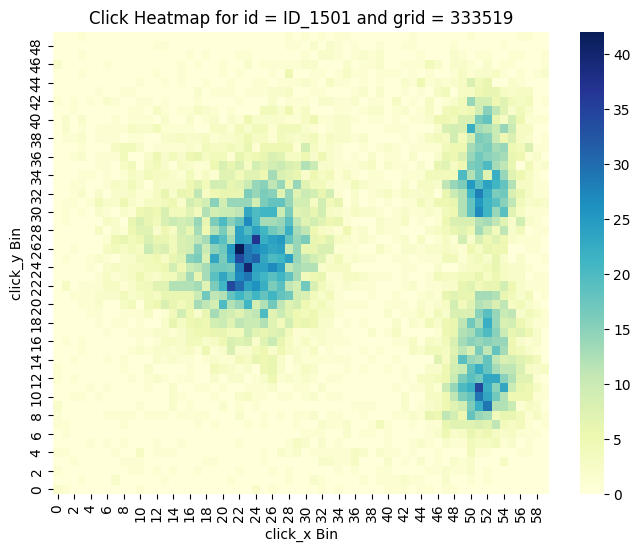

Total clicks for (grid_id, domain): (333519, ID_1501): 86364


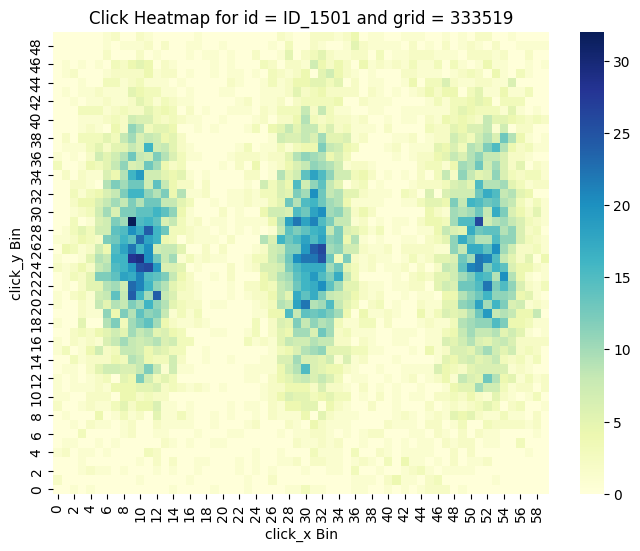

In [12]:
# selection of empirical distribution: pick most clicks and highest landing rate:

representative_heatmap = {}

for g_id in [333519, 333346]:
    filtered_data = data_metrics[data_metrics.grid_id == g_id]

    result = filtered_data[(filtered_data.landed_clicks / filtered_data.clicks) > 0.8]
    dom = result.sort_values(by='clicks', ascending=False).iloc[0].domain
    representative_heatmap[g_id] = dom
    
    data_obs = aggregated_clicks[(aggregated_clicks.grid_id == g_id) &
                                 (aggregated_clicks.domain == dom)]
    print(f'Total clicks for (grid_id, domain): (333519, {dom}): {data_obs.clicks_sum.sum()}')
    data_obs['proba'] = data_obs['clicks_sum']/data_obs['clicks_sum'].sum()
    data_obs_enh = enhance_data(data_obs, 'proba', 10000, 1.5)
    click_matrix = data_obs_enh.pivot("click_y_bin",
                                      "click_x_bin",
                                      "clicks_sum").fillna(0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(click_matrix, 
                cmap = "YlGnBu", 
                annot = False, 
                cbar = True, 
                fmt = "g")
    plt.title(f'Click Heatmap for id = {dom} and grid = {333519}')
    plt.xlabel('click_x Bin')
    plt.ylabel('click_y Bin')
    plt.gca().invert_yaxis() 
    plt.show()

## 4b. Calculate the empirical distribution for the broken banners (i.e. represnetative broken banner)

Calculate the empirical distribution for the broken banners (i.e. $H_1$). To do this, we use the broken banners from the new dataset and sum all the distributions.

In [13]:
data_broken = {}
data_broken_proba = {}

In [14]:
for g_id in [333519, 333346]:
    agg_broken = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) & 
                      (aggregated_clicks_6p.domain.isin(cb_6p[g_id]))]
    
    data_broken[g_id] = agg_broken.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()
    
    total_clicks = agg_broken.groupby(['grid_id', 'domain'])['clicks_sum'].transform('sum')
    agg_broken['proba'] = agg_broken['clicks_sum'] / total_clicks
    
    data_broken_proba[g_id] = agg_broken.groupby(['click_x_bin','click_y_bin'
                            ]).sum('proba').reset_index()
    
    data_broken_proba[g_id]['proba1'] = data_broken_proba[g_id]['proba']/data_broken_proba[g_id].proba.sum()


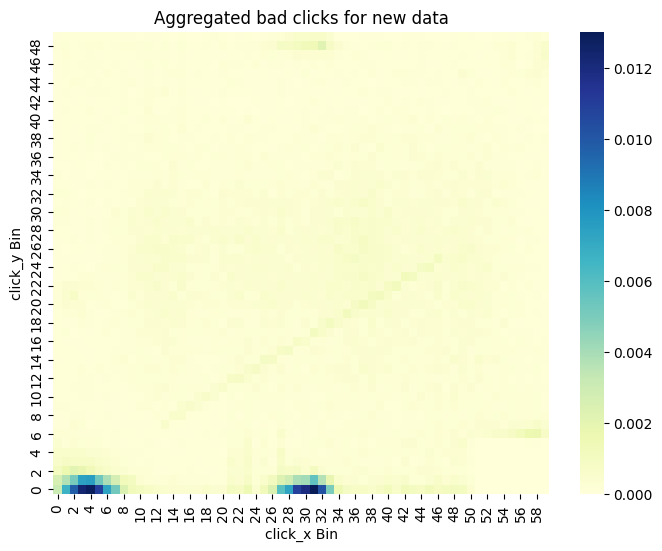

In [15]:
combined_agg_broken = data_broken_proba[333346].drop(columns = ['grid_id']).merge(data_broken_proba[333346].drop(columns = ['grid_id']), on = ['click_x_bin','click_y_bin'], how='outer').fillna(0)
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_x']+combined_agg_broken['proba_y']
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_comb']/combined_agg_broken.proba_comb.sum()

click_matrix = combined_agg_broken.pivot("click_y_bin",
                                  "click_x_bin",
                                  "proba_comb").fillna(0)
plt.figure(figsize=(8, 6))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Aggregated bad clicks for new data')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
plt.show()

In [16]:
# data_bad = pd.DataFrame(list(product(range(0,60),range(0,50))), 
#                                           columns=['click_x_bin', 'click_y_bin'])
# data_bad['proba'] = 1/data_bad.shape[0]

data_bad_6p = combined_agg_broken[['click_x_bin','click_y_bin','proba_comb']].copy()
data_bad_6p = data_bad_6p.rename(columns = {'proba_comb':'proba'})

## 4c. Run gridsearch for LRT on old data:

In [17]:
start_time = time.time()
# avoid dividing by 0:
eps = 1e-20

# keep track of misidentified:
misid = {}
misid1 = {}

outputs = {333519: [], 333346: []}
labels = {333519: [], 333346: []}
domains = {333519: [], 333346: []}

for g_id in [333519, 333346]: 

    data = aggregated_clicks_by_grid[aggregated_clicks_by_grid.grid_id == g_id]

    data = pd.DataFrame(list(product(range(0,60),range(0,50))), 
                                columns=['click_x_bin', 'click_y_bin'])

    # representative probabilities:

    data_obs_rep = aggregated_clicks[(aggregated_clicks.grid_id == g_id) &
                                        (aggregated_clicks.domain == representative_heatmap[g_id])]

    # merge enhanced observed heatmap with empirical distribution
    # in order to get empircal probabilities for bins:

    data_obs_rep = data_obs_rep.merge(data, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='right').fillna(0)

    data_obs_rep['proba'] = data_obs_rep.clicks_sum/data_obs_rep.clicks_sum.sum()

    data = data.merge(data_obs_rep[['click_x_bin','click_y_bin','proba']], 
                        on = ['click_x_bin','click_y_bin'], 
                        how='left' )

    data = data.fillna(0)


    # run over domains, dom for given grid_id = g_id:
    for dom in domains_by_grid_id[domains_by_grid_id.grid_id == g_id]['domain'].iloc[0]:

        # data_obs = "observed" heatmap for current domain_id = dom
        data_obs_1 = aggregated_clicks[(aggregated_clicks.grid_id == g_id) &
                                        (aggregated_clicks.domain == dom)]
        
        data_obs_1['clicks_sum'] = 1000*data_obs_1['clicks_sum']/data_obs_1['clicks_sum'].sum()
        data_obs = data_obs_1[['click_x_bin','click_y_bin','clicks_sum']].merge(data, 
                                        on=['click_x_bin','click_y_bin'], 
                                        how='right').fillna(0)
        
        from_obs = (np.log(data_obs['proba']+eps)*data_obs['clicks_sum']).sum()
        
        ####################
        # "lrt" method:

        data_obs_bad = data_obs_1[['click_x_bin','click_y_bin','clicks_sum']].merge(data_bad_6p, 
                                        on=['click_x_bin','click_y_bin'], 
                                        how='right').fillna(0)

        from_obs_bad = (np.log(data_obs_bad['proba']+eps)*data_obs_bad['clicks_sum']).sum()

        loglrt = from_obs - from_obs_bad

        
        outputs[g_id].append(loglrt)
        domains[g_id].append(dom)
        if dom in cb[g_id]: # broken
            labels[g_id].append(1)
        else: # working
            labels[g_id].append(0)

end_time = time.time()

In [18]:
nb_banners = len(domains_by_grid_id.iloc[0]['domain']) + len(domains_by_grid_id.iloc[1]['domain'])

In [19]:
print((end_time - start_time)/nb_banners) # time per domain

0.04036807160947065


In [20]:
all_outputs = np.array(outputs[333346] + outputs[333519])
all_labels = np.array(labels[333346] + labels[333519])
neg_outputs = np.negative(all_outputs)
all_preds = (neg_outputs - min(neg_outputs))/(max(neg_outputs) - min(neg_outputs))

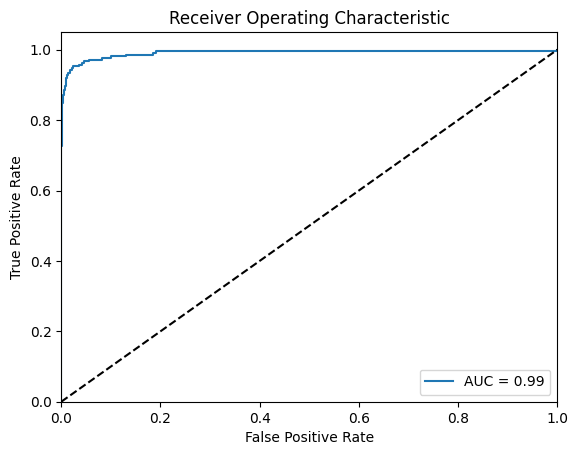

In [21]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_preds)

# Calculate AUC score
auc = roc_auc_score(all_labels, all_preds)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
from sklearn.metrics import f1_score
threshs = np.linspace(1,0.01,100)
best_f1 = 0
best_thresh = 0
all_f1 = []
for thresh in threshs:
    all_preds_cut_off = [1 if all_preds[i] > thresh else 0 for i in range(len(all_preds))]
    f1 = f1_score(all_labels, all_preds_cut_off, average='macro')
    
    if best_f1 < f1:
        best_f1 = f1
        best_thresh = thresh
    all_f1.append(f1)
    print(f1)

0.4674247080516288
0.47226323408222676
0.47226323408222676
0.47226323408222676
0.4770579715142946
0.4770579715142946
0.4818095326661564
0.4818095326661564
0.4865185185185186
0.4911855189757075
0.495811113119718
0.5003958694573003
0.5003958694573003
0.5183375300232719
0.5183375300232719
0.5227262712611264
0.5313913470993117
0.5441153259325512
0.5605896276196786
0.5646235296606584
0.5804332885570584
0.5881483777640009
0.5919598571842131
0.6142073946066686
0.6249477611940298
0.6354446917106764
0.6423116615067079
0.6524217556882986
0.6524217556882986
0.6524217556882986
0.6557422048535239
0.6557422048535239
0.6655587957800839
0.6687836617049843
0.6719853122101717
0.6783200187969924
0.6814535909512921
0.684564979978158
0.687654434396559
0.687654434396559
0.687654434396559
0.6937685151499402
0.6997977489678084
0.70278113166127
0.70278113166127
0.7116090622888018
0.7173947027181437
0.7202582728006457
0.7202582728006457
0.7259279553797355
0.7342918755549672
0.7370431455337115
0.7424917837913432

In [23]:
print(best_f1)
print(best_thresh)

0.9537527157191475
0.21999999999999997


In [33]:
from sklearn.metrics import confusion_matrix
all_preds_cut_off = [1 if all_preds[i] > best_thresh else 0 for i in range(len(all_preds))]
confusion_matrix(all_labels, all_preds_cut_off)

array([[1507,   14],
       [  20,  192]])

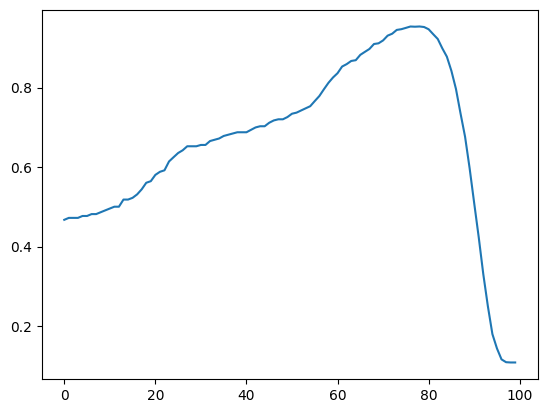

In [25]:
plt.plot(all_f1)

(array([  2.,   4.,   6.,  14.,  15.,   6.,   7.,   3.,   8.,   8.,  12.,
         30.,  23.,  22.,  25.,  44., 122., 625., 705.,  52.]),
 array([-4367.94284166, -4081.04848244, -3794.15412323, -3507.25976402,
        -3220.36540481, -2933.4710456 , -2646.57668639, -2359.68232718,
        -2072.78796797, -1785.89360876, -1498.99924955, -1212.10489033,
         -925.21053112,  -638.31617191,  -351.4218127 ,   -64.52745349,
          222.36690572,   509.26126493,   796.15562414,  1083.04998335,
         1369.94434256]),
 <BarContainer object of 20 artists>)

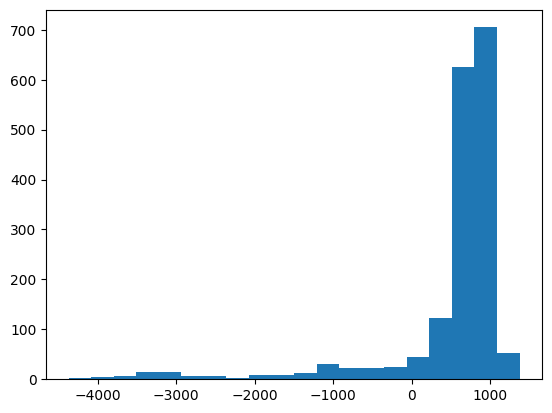

In [30]:
plt.hist(all_outputs, bins = 20)

(array([ 52., 705., 625., 122.,  44.,  25.,  22.,  23.,  30.,  12.,   8.,
          8.,   3.,   7.,   6.,  15.,  14.,   6.,   4.,   2.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

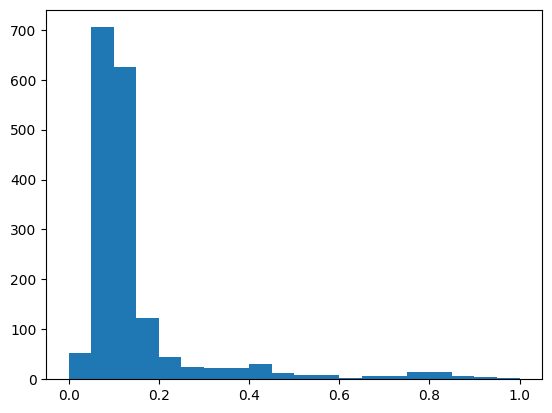

In [31]:
plt.hist(all_preds, bins = 20)

# 5. LRT - New data:

## 5a. Representative working

In [ ]:
representative_heatmap_6p = {}

for g_id in [333519, 333346]:
    filtered_data = data_metrics_6p[data_metrics_6p.grid_id == g_id]

    result    = filtered_data[(filtered_data.landed_clicks / filtered_data.clicks) > 0.8]
    uniq_doms = result.domain.unique()
    f1 = data_heatmap_6p[(data_heatmap_6p.grid_id==g_id)]
    dom_sorted = f1[f1.domain.isin(uniq_doms)].groupby(['domain']).sum('clicks').sort_values(by='clicks', 
                                                                                             ascending=False)
    dom = dom_sorted.reset_index().iloc[0].domain
    representative_heatmap_6p[g_id] = dom
    
    data_obs = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) &
                                 (aggregated_clicks_6p.domain == dom)]
    print(f'Total clicks for (grid_id, domain): ({g_id}, {dom}): {data_obs.clicks_sum.sum()}')
    data_obs['proba'] = data_obs['clicks_sum']/data_obs['clicks_sum'].sum()
    #data_obs_enh = enhance_data(data_obs, 'proba', 10000, 1.5)
    click_matrix = data_obs.pivot("click_y_bin",
                                      "click_x_bin",
                                      "clicks_sum").fillna(0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(click_matrix, 
                cmap = "YlGnBu", 
                annot = False, 
                cbar = True, 
                fmt = "g")
    plt.title(f'Click Heatmap for id = {dom} and grid = {g_id}')
    plt.xlabel('click_x Bin')
    plt.ylabel('click_y Bin')
    plt.gca().invert_yaxis() 
    plt.show()

In [ ]:
data_heatmap_6p[(data_heatmap_6p.grid_id==333346)].groupby(['domain']).sum('clicks').sort_values(by='clicks', 
                                                                                             ascending=False).head(5)

In [ ]:
dom = 'ID_3516'
representative_heatmap_6p[333346] = dom
    
data_obs = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) &
                             (aggregated_clicks_6p.domain == dom)]
print(f'Total clicks for (grid_id, domain): (333519, {dom}): {data_obs.clicks_sum.sum()}')
data_obs['proba'] = data_obs['clicks_sum']/data_obs['clicks_sum'].sum()
# data_obs_enh = enhance_data(data_obs, 'proba', 200000, 0)
click_matrix = data_obs.pivot("click_y_bin",
                                  "click_x_bin",
                                  "clicks_sum").fillna(0)
plt.figure(figsize=(8, 6))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Click Heatmap for id = {dom} and grid = {333346}')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
plt.show()

## 5b. Representative broken (using bad data from old data)

In [ ]:
for g_id in [333519, 333346]:
    agg_broken = aggregated_clicks[(aggregated_clicks.grid_id == g_id) & 
                      (aggregated_clicks.domain.isin(cb[g_id]))]
    
    data_broken[g_id] = agg_broken.groupby([
                                'grid_id','click_x_bin','click_y_bin'
                            ]).sum('clicks_sum').reset_index()
    
    total_clicks = agg_broken.groupby(['grid_id', 'domain'])['clicks_sum'].transform('sum')
    agg_broken['proba'] = agg_broken['clicks_sum'] / total_clicks
    
    data_broken_proba[g_id] = agg_broken.groupby(['click_x_bin','click_y_bin'
                            ]).sum('proba').reset_index()
    
    data_broken_proba[g_id]['proba1'] = data_broken_proba[g_id]['proba']/data_broken_proba[g_id].proba.sum()
    

In [ ]:
combined_agg_broken = data_broken_proba[333346].drop(columns = ['grid_id']).merge(data_broken_proba[333346].drop(columns = ['grid_id']), on = ['click_x_bin','click_y_bin'], how='outer').fillna(0)
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_x']+combined_agg_broken['proba_y']
combined_agg_broken['proba_comb'] = combined_agg_broken['proba_comb']/combined_agg_broken.proba_comb.sum()

click_matrix = combined_agg_broken.pivot("click_y_bin",
                                  "click_x_bin",
                                  "proba_comb").fillna(0)
plt.figure(figsize=(8, 6))
sns.heatmap(click_matrix, 
            cmap = "YlGnBu", 
            annot = False, 
            cbar = True, 
            fmt = "g")
plt.title(f'Aggregated bad clicks for new data')
plt.xlabel('click_x Bin')
plt.ylabel('click_y Bin')
plt.gca().invert_yaxis() 
plt.show()

In [ ]:
data_bad = combined_agg_broken[['click_x_bin','click_y_bin','proba_comb']].copy()
data_bad = data_bad.rename(columns = {'proba_comb':'proba'})

## 5c. Grid search for new data

In [ ]:
domains_by_grid_id_6p

In [ ]:
start_time = time.time()
# avoid dividing by 0:
eps = 1e-20

# keep track of misidentified:
misid = {}
misid1 = {}

outputs = {333519: [], 333346: []}
labels = {333519: [], 333346: []}
domains = {333519: [], 333346: []}

for g_id in [333519, 333346]: 

    data = aggregated_clicks_by_grid_6p[aggregated_clicks_by_grid_6p.grid_id == g_id]

    data = pd.DataFrame(list(product(range(0,60),range(0,50))), 
                                columns=['click_x_bin', 'click_y_bin'])

    # representative probabilities:

    data_obs_rep = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) &
                                        (aggregated_clicks_6p.domain == representative_heatmap_6p[g_id])]

    # merge enhanced observed heatmap with empirical distribution
    # in order to get empircal probabilities for bins:

    data_obs_rep = data_obs_rep.merge(data, 
                                    on=['click_x_bin','click_y_bin'], 
                                    how='right').fillna(0)

    data_obs_rep['proba'] = data_obs_rep.clicks_sum/data_obs_rep.clicks_sum.sum()

    data = data.merge(data_obs_rep[['click_x_bin','click_y_bin','proba']], 
                        on = ['click_x_bin','click_y_bin'], 
                        how='left' )

    data = data.fillna(0)


    # run over domains, dom for given grid_id = g_id:
    for dom in domains_by_grid_id_6p[domains_by_grid_id_6p.grid_id == g_id]['domain'].iloc[0]:

        # data_obs = "observed" heatmap for current domain_id = dom
        data_obs_1 = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) &
                                        (aggregated_clicks_6p.domain == dom)]
        
        data_obs_1['clicks_sum'] = 1000*data_obs_1['clicks_sum']/data_obs_1['clicks_sum'].sum()
        data_obs = data_obs_1[['click_x_bin','click_y_bin','clicks_sum']].merge(data, 
                                        on=['click_x_bin','click_y_bin'], 
                                        how='right').fillna(0)
        
        from_obs = (np.log(data_obs['proba']+eps)*data_obs['clicks_sum']).sum()
        
        ####################
        # "lrt" method:

        data_obs_bad = data_obs_1[['click_x_bin','click_y_bin','clicks_sum']].merge(data_bad_6p, 
                                        on=['click_x_bin','click_y_bin'], 
                                        how='right').fillna(0)

        from_obs_bad = (np.log(data_obs_bad['proba']+eps)*data_obs_bad['clicks_sum']).sum()

        loglrt = from_obs - from_obs_bad

        outputs[g_id].append(loglrt)
        domains[g_id].append(dom)
        if dom in cb_6p[g_id]: # broken
            labels[g_id].append(1)
        else: # working
            labels[g_id].append(0)

end_time = time.time()

In [ ]:
nb_banners = len(domains_by_grid_id_6p.iloc[0]['domain']) + len(domains_by_grid_id_6p.iloc[1]['domain'])

In [ ]:
print((end_time - start_time)/nb_banners) # time per domain

In [ ]:
all_outputs = np.array(outputs[333346] + outputs[333519])
all_labels = np.array(labels[333346] + labels[333519])
neg_outputs = np.negative(all_outputs)
all_preds = (neg_outputs - min(neg_outputs))/(max(neg_outputs) - min(neg_outputs))

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_preds)

# Calculate AUC score
auc = roc_auc_score(all_labels, all_preds)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import f1_score
threshs = np.linspace(1,0.01,100)
best_f1 = 0
best_thresh = 0
all_f1 = []
for thresh in threshs:
    all_preds_cut_off = [1 if all_preds[i] > thresh else 0 for i in range(len(all_preds))]
    f1 = f1_score(all_labels, all_preds_cut_off, average='macro')
    
    if best_f1 < f1:
        best_f1 = f1
        best_thresh = thresh
    all_f1.append(f1)
    print(f1)

In [ ]:
print(best_f1)
print(best_thresh)

In [ ]:
from sklearn.metrics import confusion_matrix
all_preds_cut_off = [1 if all_preds[i] > best_thresh else 0 for i in range(len(all_preds))]
confusion_matrix(all_labels, all_preds_cut_off)

In [ ]:
plt.plot(all_f1)

In [ ]:
# ######################## ORIGINAL CODE THAT IS WORKING ########################

# # Run gridsearch for LRT:

# # upsampling size:
# # size = 1000

# # avoid dividing by 0:
# eps = 1e-20

# # stdev for noisy bootstrap enhancement:
# # stdev = 0

# # keep track of misidentified:
# misid = {}
# misid1 = {}

# threshs = np.linspace(1,0.01,100)

# # p-value threshold for chi-squared test:
# # pv_thresh = 0.0000001

# # probability threshold:
# # proba_thres = 0.0000001

# for stdev in [0]:
#     for size in [1000]:
#         for g_id in [333519, 333346]:

#             TP = {i:0 for i, pct_thres in enumerate(threshs)}
#             TN = {i:0 for i, pct_thres in enumerate(threshs)}
#             FP = {i:0 for i, pct_thres in enumerate(threshs)}
#             FN = {i:0 for i, pct_thres in enumerate(threshs)}

#             # data = repr clicks for grid_id = g_id (in principle should probably do some train/test split):
#             data = pd.DataFrame(list(product(range(0,60),range(0,50))), 
#                                       columns=['click_x_bin', 'click_y_bin'])

#             # data = aggregated_clicks_by_grid_6p[aggregated_clicks_by_grid_6p.grid_id == g_id]

#             # compute probability by bin
#             # data['proba'] = data['clicks_sum']/data['clicks_sum'].sum()

#             # representative probabilities:
#             data_obs_rep = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) &
#                                              (aggregated_clicks_6p.domain == representative_heatmap[g_id])]

#             # merge enhanced observed heatmap with empirical distribution
#             # in order to get empircal probabilities for bins:
#             data_obs_rep = data_obs_rep.merge(data, 
#                                           on=['click_x_bin','click_y_bin'], 
#                                           how='right').fillna(0)

#             data_obs_rep['proba'] = data_obs_rep.clicks_sum/data_obs_rep.clicks_sum.sum()

#             data = data.merge(data_obs_rep[['click_x_bin','click_y_bin','proba']], 
#                               on = ['click_x_bin','click_y_bin'], 
#                               how='left' )

#             data = data.fillna(0)

#             '''
#             compute probability for "average" heatmap based on bootstrap sampling of data. 

#             The empirical distribution is given by the proba columns and we bootstrap
#             sample based on that column as well as evaluate the log-probability.

#             The bootstrapped sample is of size = size (notice that the size should be 
#             the same as the size for the instance-heatmap to get "fair" comparison, if not
#             we would have to normalize accordingly).

#             n_bootstrap = number of generated heatmaps to compute average.

#             The following returns the avg log-probability:
#             '''
#             avg_from_empirical = weighted_bootstrap_resample(data, 
#                                                              'proba', 
#                                                              'proba', 
#                                                              size, 
#                                                              n_bootstraps=1000)


#             # run over domains, dom for given grid_id = g_id:
#             for dom in domains_by_grid_id_6p[domains_by_grid_id_6p.grid_id == g_id]['domain'].iloc[0]:

#                 ####################
#                 # chi-squared method:
#                 # returns p-value for chi-squared comparison of heatmap vs empirical distribution
# #                     _, pv, tot_obs = Chi_squared_test_enh(aggregated_clicks_6p, 
# #                                                           aggregated_clicks_by_grid_6p, 
# #                                                           dom, g_id, size, .5)

#                 ####################
#                 # log-probability method:

#                 # data_obs = "observed" heatmap for current domain_id = dom
#                 data_obs = aggregated_clicks_6p[(aggregated_clicks_6p.grid_id == g_id) &
#                                              (aggregated_clicks_6p.domain == dom)]

#                 # add proba column in order to do bootstrap enhancement:
#                 data_obs['proba'] = data_obs['clicks_sum']/data_obs['clicks_sum'].sum()

#                 # enhanced observed heatmap of size = size, with stdev = stdev 
#                 # and sampling based on proba column:
#                 data_obs_enh = enhance_data(data_obs, 'proba', size, stdev)

#                 # merge enhanced observed heatmap with empirical distribution
#                 # in order to get empircal probabilities for bins:
#                 data_obs = data_obs_enh.merge(data, 
#                                               on=['click_x_bin','click_y_bin'], 
#                                               how='right').fillna(0)

#                 # log-probablity for enhanced oberved heatmap given the underlying empirical distribution:
#                 from_obs = (np.log(data_obs['proba']+eps)*data_obs['clicks_sum']).sum()

#                 # compare with average heatmap from empirical distribution:
#                 # prob = P[distr for domain]/P[avg distr]
#                 prob = np.exp(from_obs - avg_from_empirical)
#                 log_prob = from_obs - avg_from_empirical

#                 ####################
#                 # "lrt" method:

#                 data_obs_bad = data_obs_enh.merge(data_bad, 
#                                               on=['click_x_bin','click_y_bin'], 
#                                               how='right').fillna(0)

#                 from_obs_bad = (np.log(data_obs_bad['proba']+eps)*data_obs_bad['clicks_sum']).sum()

#                 loglrt = from_obs - from_obs_bad

#                 for i, pct_thres in enumerate(threshs):
#                     if loglrt < np.log(pct_thres):
#                         if dom in cb_6p[g_id]:
#                             TP[i] += 1
#                         else:
#                             FP[i] += 1
#                     else:
#                         if dom in cb_6p[g_id]:
#                             FN[i] += 1
#                         else:
#                             TN[i] += 1

        
#             for i, pct_thres in enumerate(threshs):
#                 print('----------------------------------------')
#                 print(f'Pct Threshold: {pct_thres:.2f}')
#                 if TP[i]+FP[i] != 0 and TP[i]+FN[i] !=0:
#                     TP1, TN1, FP1, FN1 = TP[i], TN[i], FP[i], FN[i]
                
#                 print(f'Confusion matrix: ((TN,FN),(FP,TP)) = ({TN1},{FN1}),({FP1},{TP1})')
#                 prec = TP1/(TP1+FP1)
#                 recall = TP1/(TP1+FN1)
#                 F1 = 2*prec*recall/(prec+recall)
#                 print(f'F1-score: {F1:.5f}')
            